In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
booksdf = pd.read_csv(r'./sample_data/bestsellers with categories.csv')

In [ ]:
booksdf.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
booksdf.shape

(550, 7)

In [ ]:
booksdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
#check for duplicate rows
booksdf.duplicated().value_counts()

False    550
dtype: int64

In [ ]:
#check for null values
booksdf.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

# *Exploratory Data Analysis*

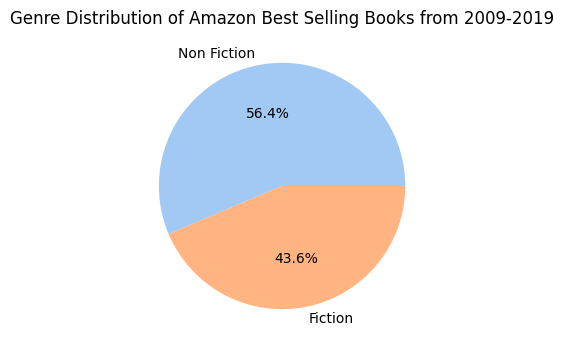

In [ ]:
#Genre Distribution of Amazon Best Selling Books from 2009-2019
import seaborn as sns
plt.figure(figsize=(4,4))
x1=booksdf['Genre'].value_counts().index
y1=booksdf['Genre'].value_counts().values
plt.pie(y1,labels=x1, colors = sns.color_palette('pastel'), autopct='%1.1f%%')
plt.title('Genre Distribution of Amazon Best Selling Books from 2009-2019')
plt.legend
plt.show()

In [ ]:
#Top Ten Highest-Rated Amazon Best Sellers from 2009-2019
booksdf[['Name','User Rating']].groupby(['Name']).mean().sort_values(by='User Rating', ascending=False).head(10)

,User Rating
Name,
Hamilton: The Revolution,4.9
Rush Revere and the First Patriots: Time-Travel Adventures With Exceptional Americans (2),4.9
"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",4.9
"Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)",4.9
"Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)",4.9
"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",4.9
Dog Man: Brawl of the Wild: From the Creator of Captain Underpants (Dog Man #6),4.9
"Brown Bear, Brown Bear, What Do You See?",4.9
Rush Revere and the Brave Pilgrims: Time-Travel Adventures with Exceptional Americans (1),4.9


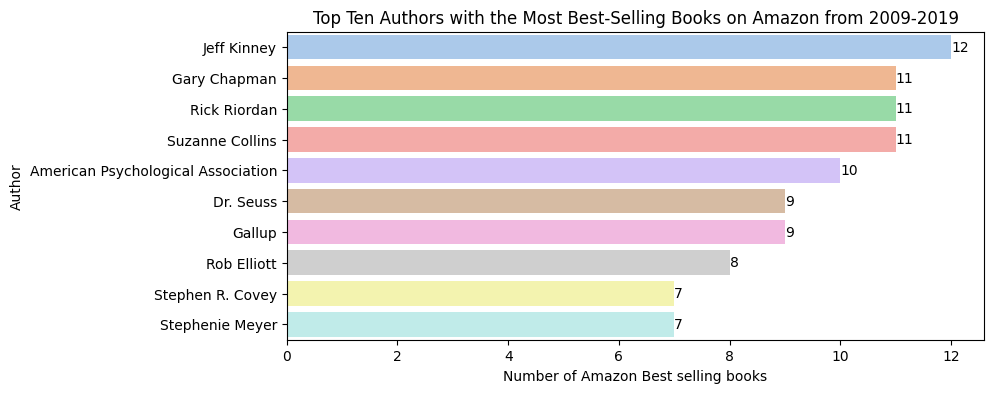

In [ ]:

#Top Ten Authors with the Most Best-Selling Books on Amazon from 2009-2019
import seaborn as sns
plt.figure(figsize=(9,4))
x1= booksdf['Author'].value_counts().nlargest(10).index
y1= booksdf['Author'].value_counts().nlargest(10).values
ax=sns.barplot(x=y1,y=x1,palette='pastel')
ax.bar_label(ax.containers[0])
plt.xlabel('Number of Amazon Best selling books')
plt.ylabel('Author')
plt.title('Top Ten Authors with the Most Best-Selling Books on Amazon from 2009-2019')
plt.legend
plt.show()

In [ ]:
#Top Ten Highest-Rated Amazon Best Sellers Authors from 2009 to 2019
booksdf[['Author','User Rating']].groupby(['Author']).mean().sort_values(by='User Rating', ascending=False).head(10)

,User Rating
Author,
Patrick Thorpe,4.9
Lin-Manuel Miranda,4.9
Chip Gaines,4.9
Sherri Duskey Rinker,4.9
Nathan W. Pyle,4.9
Pete Souza,4.9
Sarah Young,4.9
Bill Martin Jr.,4.9
Dav Pilkey,4.9


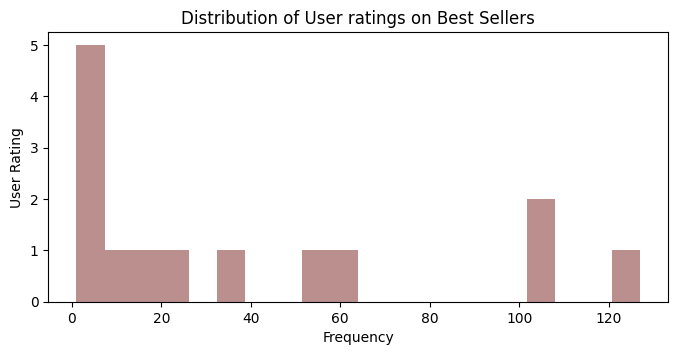

In [ ]:
#User Rating Distribution Among the Best Sellers
plt.figure(figsize=(8,3.5))
x= booksdf['User Rating'].value_counts()
plt.hist(x, bins=20, color='rosybrown')
plt.xlabel('Frequency')
plt.ylabel('User Rating')
plt.title('User Rating Distribution Among the Best Sellers')
plt.legend
plt.show()

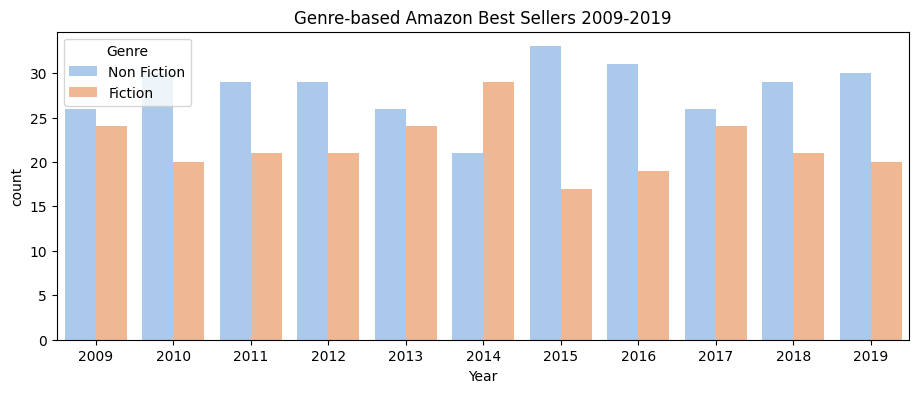

In [ ]:
#Genre-based Amazon Best Sellers from 2009-2019
plt.figure(figsize=(11,4))
sns.countplot(data=booksdf,x='Year', hue='Genre', palette='pastel')
plt.title('Genre-based Amazon Best Sellers 2009-2019')
plt.show()

In [ ]:
#Classifying Prices into Low, Middle, and High Ranges
booksdf['Price_Range']= pd.cut(booksdf['Price'],3, labels=['Low Range', 'Mid Range','High Range'])

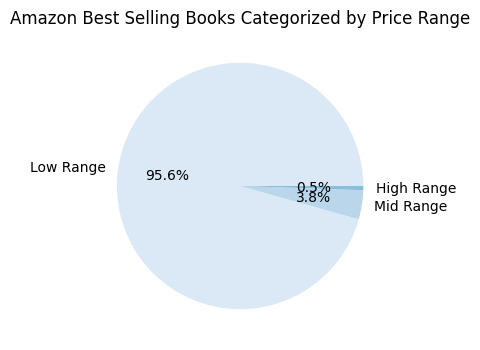

In [ ]:
#Amazon Best Selling Books Categorized by Price Range
plt.figure(figsize=(4,4))
x1=booksdf['Price_Range'].value_counts().index
y1=booksdf['Price_Range'].value_counts().values
plt.pie(y1,labels=x1, colors = sns.color_palette('Blues'), autopct='%1.1f%%')
plt.title('Amazon Best Selling Books Categorized by Price Range')
plt.legend
plt.show()

In [ ]:
#Amazon Best Sellers Average Reviews Across Price Ranges
booksdf.groupby(['Price_Range'])['Reviews'].mean().round()

Price_Range
Low Range     12176.0
Mid Range      7259.0
High Range     5720.0
Name: Reviews, dtype: float64